#TASK 1
#DATAFRAME IMPELEMENTATION 

In [0]:
#check the file directory 
dbutils.fs.ls('/FileStore/tables/')

[FileInfo(path='dbfs:/FileStore/tables/.Test-unix/', name='.Test-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/.XIM-unix/', name='.XIM-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/.font-unix/', name='.font-unix/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709138386000),
 FileInfo(path='dbfs:/FileStore/tables/SQLcount_month.csv/', name='SQLcount_month.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1709709833000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationT

##part 2: Prepare / clean the data for Dataframe implementation

In [0]:
#create an RDD 
myrdd = sc.textFile('/FileStore/tables/clinicaltrial_2023.csv')

#use lambda function to remove excess punctuation 
myrdd2 = myrdd.map(lambda row: row.replace(',', '').replace('"', ''))

#return the first two elements of myrdd2
myrdd2.take(2)

['Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion',
 "NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)\tBEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28"]

In [0]:
#split the file base on \t delimeter
myrdd3 = myrdd2.map(lambda x: x.split('\t'))
myrdd3.take(3)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cog

In [0]:
#Create a user define function 
def filter_row_length(row, column_length):     
    #return true if length of rows matches length of column header, else return false 
    match_length = len(row) == column_length 
    return match_length

#count the length of column header
myrdd3_header = len(myrdd3.first())

#Filter rows in myrdd3 base on length of rows equals MYRRD
myrdd4 = myrdd3.filter(lambda row: filter_row_length(row, myrdd3_header))

In [0]:
#converting rdd to dataframe using toDF method 
df = myrdd4.toDF()
df.show(5)

+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         _1|                  _2|       _3|        _4|                  _5|                  _6|                  _7|                  _8|        _9|        _10|           _11|                 _12|       _13|       _14|
+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
|NCT03630471|Effectiveness of ...|    PRIDE| COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangat

In [0]:
# Renaming the columns
df1 = df.withColumnRenamed('_1', 'Id') \
    .withColumnRenamed('_2', 'Study_Title') \
    .withColumnRenamed('_3', 'Acronym') \
    .withColumnRenamed('_4', 'Status') \
    .withColumnRenamed('_5', 'Conditions') \
    .withColumnRenamed('_6', 'Interventions') \
    .withColumnRenamed('_7', 'Sponsor') \
    .withColumnRenamed('_8', 'Collaborators') \
    .withColumnRenamed('_9', 'Enrollment') \
    .withColumnRenamed('_10', 'Funder_Type') \
    .withColumnRenamed('_11', 'Type') \
    .withColumnRenamed('_12', 'Study_Design') \
    .withColumnRenamed('_13', 'Start') \
    .withColumnRenamed('_14', 'Completion')

# Show the DataFrame
df1.show(5)



+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study_Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder_Type|          Type|        Study_Design|     Start|Completion|
+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
|NCT03630471|Effectiveness of ...|    PRIDE| COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangat

In [0]:
#selecting specific columns for analysis
from pyspark.sql.functions import col 
df2 = df1.select('Study_Title', 'Status', 'Conditions', 'Sponsor', 'Type', 'Completion') 
df2.show(5)

+--------------------+----------+--------------------+--------------------+--------------+----------+
|         Study_Title|    Status|          Conditions|             Sponsor|          Type|Completion|
+--------------------+----------+--------------------+--------------------+--------------+----------+
|         Study Title|    Status|          Conditions|             Sponsor|          Type|Completion|
|Effectiveness of ...| COMPLETED|Mental Health Iss...|             Sangath|INTERVENTIONAL|2019-02-28|
|Oral Ketone Monoe...|RECRUITING|Cerebrovascular F...| McMaster University|INTERVENTIONAL|   2024-08|
|Impact of Tight G...|TERMINATED|Myocardial Infarc...|    Melbourne Health|INTERVENTIONAL|   2006-05|
|New Prognostic Pr...|RECRUITING|Decompensated Cir...|Assistance Publiq...|INTERVENTIONAL|2023-10-01|
+--------------------+----------+--------------------+--------------------+--------------+----------+
only showing top 5 rows



In [0]:
# apply filter function to remove one of the header 
df3 = df2.filter(col('Study_Title') != 'Study Title')
df3.show(5)

+--------------------+------------------+--------------------+--------------------+--------------+----------+
|         Study_Title|            Status|          Conditions|             Sponsor|          Type|Completion|
+--------------------+------------------+--------------------+--------------------+--------------+----------+
|Effectiveness of ...|         COMPLETED|Mental Health Iss...|             Sangath|INTERVENTIONAL|2019-02-28|
|Oral Ketone Monoe...|        RECRUITING|Cerebrovascular F...| McMaster University|INTERVENTIONAL|   2024-08|
|Impact of Tight G...|        TERMINATED|Myocardial Infarc...|    Melbourne Health|INTERVENTIONAL|   2006-05|
|New Prognostic Pr...|        RECRUITING|Decompensated Cir...|Assistance Publiq...|INTERVENTIONAL|2023-10-01|
|InTake Care: Deve...|NOT_YET_RECRUITING|Hypertension|Trea...|Istituto Auxologi...|INTERVENTIONAL|2026-04-01|
+--------------------+------------------+--------------------+--------------------+--------------+----------+
only showi

#Part 3: Analyse the Data

###Question 1: The number of studies in the dataset. You must ensure that you explicitly check distinct studies

In [0]:
#select Study_Title from the Df3 and apply distinct and count methods
distinct_studies = df3.select('Study_Title').distinct().count()
print(f'The Number of didtinct studies is: {distinct_studies}')

The Number of didtinct studies is: 481083


###Question 2: You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
# import pyspark functions in order to execute the code
from pyspark.sql.functions import *
type_df = df3.groupBy('Type').count() \
    .orderBy(desc('count'))

#show dataframe
type_df.show()

+---------------+------+
|           Type| count|
+---------------+------+
| INTERVENTIONAL|371382|
|  OBSERVATIONAL|110221|
|EXPANDED_ACCESS|   928|
|               |   889|
+---------------+------+



In [0]:
#Import col and trim functions from pyspark
from pyspark.sql.functions import col, trim

#Filter rows from the Type column where the value is not NULL and is not an empty string
filtertype_df = type_df.filter((col('Type').isNotNull()) & (trim(col('Type')) != ''))

#Show the resulting DataFrame
filtertype_df.show()


+---------------+------+
|           Type| count|
+---------------+------+
| INTERVENTIONAL|371382|
|  OBSERVATIONAL|110221|
|EXPANDED_ACCESS|   928|
+---------------+------+



###Question 3: The top 5 conditions (from Conditions) with their frequencies.


In [0]:
#Extract the fourth indecx from rdd2
rdd2 = myrdd4.map(lambda row: row[4]) 
rdd2.take(2)

['Conditions',
 'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)']

In [0]:
#Remove header and apply flatMap transformation to flatten rdd2
condition_header = rdd2.first()
rdd3 = rdd2.filter(lambda x: x!=condition_header).flatMap(lambda x: x.split('|'))
rdd3.take(4) 


['Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
 'Cerebrovascular Function',
 'Cognition',
 'Myocardial Infarct']

In [0]:
#Import Row from pyspark 
from pyspark import Row

#Map each element in rdd3 as a row-object
condition_rows = rdd3.map(lambda row: Row(Conditions=row))

#Convert condition_rows into a dataframe
rdd_df = spark.createDataFrame(condition_rows)

#show 5 rows of rdd_df
rdd_df.show(5)


+--------------------+
|          Conditions|
+--------------------+
|Mental Health Iss...|
|Cerebrovascular F...|
|           Cognition|
|  Myocardial Infarct|
|       Hyperglycemia|
+--------------------+
only showing top 5 rows



In [0]:
#count the top 5 Conditions in descending order
condition_df = rdd_df.groupBy('Conditions') \
.count().orderBy(desc('count')).limit(5) 
condition_df.show()

+-------------+-----+
|   Conditions|count|
+-------------+-----+
|      Healthy| 9731|
|Breast Cancer| 7502|
|      Obesity| 6549|
|       Stroke| 4073|
| Hypertension| 4024|
+-------------+-----+



###Question 4: Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the Parent Company column contains all possible pharmaceutical companies.


In [0]:
#Create an RDD from the pharma csv file
pharmrdd = sc.textFile('/FileStore/tables/pharma.csv')
pharmrdd.take(2)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
#Create a dataframe using spark.read.csv method
df_pharm = spark.read.csv(
    path=pharmrdd,
    sep=',',
    header=True, 
    inferSchema=True,           
)

#Show the first five rows
df_pharm.show(2)

+--------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+-------+-----------------------------+------------------+--------------+----+-------+----+----------+-----------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+-----+
|             Company|     Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    Civil/Criminal|Prosecution_Agreement|Court|Case_ID|

In [0]:
#Select Sponosr column 
sponsordf = df3.select('Sponsor')
sponsordf.show(5)

+--------------------+
|             Sponsor|
+--------------------+
|             Sangath|
| McMaster University|
|    Melbourne Health|
|Assistance Publiq...|
|Istituto Auxologi...|
+--------------------+
only showing top 5 rows



In [0]:
#Select unique rows and return the first 3 rows
df_pharm2 = df_pharm.distinct() 
df_pharm2.show(3)

+--------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+-------+-----------------------------+------------------+--------------+----+-------+----+----------+-----------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+-----+
|             Company|     Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    Civil/Criminal|Prosecution_Agreement|Court|Case_ID|

In [0]:
#Use 'left_anti' join between sponsordf and df_pharm2
company_sponsordf = sponsordf.join(df_pharm2, df_pharm2['Parent_Company']==sponsordf['Sponsor'], how='left_anti')

#Count the top 10 sponsors 
top_10_sponsordf = company_sponsordf.groupBy('sponsor') \
.count().orderBy(desc('count')).limit(10) 

#Display the top 10 sponsor 
top_10_sponsordf.show()


+--------------------+-----+
|             sponsor|count|
+--------------------+-----+
|National Cancer I...| 3410|
|   Assiut University| 3335|
|    Cairo University| 3023|
|Assistance Publiq...| 2951|
|         Mayo Clinic| 2766|
|M.D. Anderson Can...| 2702|
|Novartis Pharmace...| 2393|
|National Institut...| 2340|
|Massachusetts Gen...| 2263|
|National Taiwan U...| 2181|
+--------------------+-----+



##Part 5: Plot number of completed studies for each month in 2023. You need to include your visualization as well as a table of all the values you have plotted for each month.


In [0]:
#Select "Completion" and "Status" column
comp_studydf = df3.select('Completion', 'Status') 

#Display first five rows
comp_studydf.show(5)

+----------+------------------+
|Completion|            Status|
+----------+------------------+
|2019-02-28|         COMPLETED|
|   2024-08|        RECRUITING|
|   2006-05|        TERMINATED|
|2023-10-01|        RECRUITING|
|2026-04-01|NOT_YET_RECRUITING|
+----------+------------------+
only showing top 5 rows



In [0]:
#Import col from pyspark 
from pyspark.sql.functions import col

#filter col from comp_studydf on the basis to check if "completion" is "2023" and "status" is "COMPLETED" 
comp_studydf2 = comp_studydf.filter((col("Completion").like("2023%")) & (col("Status") == "COMPLETED"))
comp_studydf2.show(5)

+----------+---------+
|Completion|   Status|
+----------+---------+
|2023-02-24|COMPLETED|
|2023-04-07|COMPLETED|
|2023-08-27|COMPLETED|
|2023-06-30|COMPLETED|
|2023-08-01|COMPLETED|
+----------+---------+
only showing top 5 rows



In [0]:
#Import split, col from pyspark 
from pyspark.sql.functions import split, col

#Get only the year and month 
comp_studydf3 = comp_studydf2.withColumn('Year', split(col('Completion'), '-').getItem(0)) \
                            .withColumn('Month', split(col('Completion'), '-').getItem(1))

#Display first five rows
comp_studydf3.show(5)

+----------+---------+----+-----+
|Completion|   Status|Year|Month|
+----------+---------+----+-----+
|2023-02-24|COMPLETED|2023|   02|
|2023-04-07|COMPLETED|2023|   04|
|2023-08-27|COMPLETED|2023|   08|
|2023-06-30|COMPLETED|2023|   06|
|2023-08-01|COMPLETED|2023|   08|
+----------+---------+----+-----+
only showing top 5 rows



In [0]:
#Import col, count from pyspark 
from pyspark.sql.functions import col, count

#Count the the numnber of studies for each month
count_month = comp_studydf3.groupBy('Year', 'Month').agg(count('*').alias('count')).orderBy('Month')

#Display all rows
count_month.show()

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2023|   01| 1494|
|2023|   02| 1272|
|2023|   03| 1552|
|2023|   04| 1324|
|2023|   05| 1415|
|2023|   06| 1619|
|2023|   07| 1360|
|2023|   08| 1230|
|2023|   09| 1152|
|2023|   10| 1058|
|2023|   11|  909|
|2023|   12| 1082|
+----+-----+-----+



##Using Power Bi Visualization tool to show the count of completed studies for each month 

In [0]:
count_month.write.csv('/FileStore/tables/count_month.csv',  mode='overwrite')

In [0]:
%sql 
DROP TABLE IF EXISTS count_month;
CREATE TABLE IF NOT EXISTS count_month
using CSV 
options(path 'dbfs:/FileStore/tables/count_month.csv', header 'False', inferSchema 'True')

In [0]:
%sql 
SHOW TABLES

database,tableName,isTemporary
default,count_month,false


#Further Analysis 
##Plot the number of studies recruiting for each month in 2023

In [0]:
#Import col from pyspark 
from pyspark.sql.functions import col, split

#Select "Completion" and "Status" column
recruit_studydf = df3.select('Completion', 'Status') \
    .filter((col("Completion").like("2023%")) & (col("Status") == "RECRUITING")) \
        .withColumn('Year', split(col('Completion'), '-').getItem(0)) \
            .withColumn('Month', split(col('Completion'), '-').getItem(1))

#Display first five rows
recruit_studydf.show(5)

+----------+----------+----+-----+
|Completion|    Status|Year|Month|
+----------+----------+----+-----+
|2023-10-01|RECRUITING|2023|   10|
|2023-12-01|RECRUITING|2023|   12|
|2023-03-17|RECRUITING|2023|   03|
|2023-12-01|RECRUITING|2023|   12|
|   2023-12|RECRUITING|2023|   12|
+----------+----------+----+-----+
only showing top 5 rows



In [0]:
#Import count from pyspark 
from pyspark.sql.functions import count

#Count the the numnber of studies that is recruiting
recruiting_count = recruit_studydf.groupBy('Month').agg(count('*').alias('count')).orderBy('Month')

#convert to panda dataframe
recruiting_count_pd = recruiting_count.toPandas() 

##Using Seaborn Library

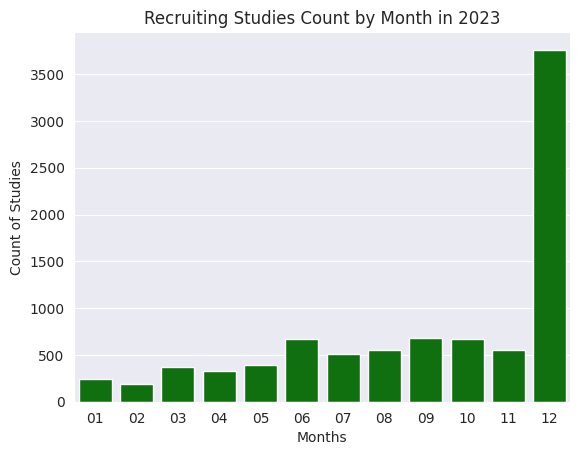

In [0]:
#import seaborn
import seaborn as sns

#import matplotlib
import matplotlib.pyplot as plt

#set background style 
sns.set_style("darkgrid")

# Plotting using Seaborn
sns.barplot(data=recruiting_count_pd, x='Month', y='count', color='green')

plt.title('Recruiting Studies Count by Month in 2023')
plt.xlabel('Months')
plt.ylabel('Count of Studies')
plt.show()
